In [1]:
import pandas as pd
import numpy as np

# 1-Minute

In [2]:
df=pd.read_csv("F.csv")
df

,t,c,o,h,l,v,vo,s
0,1619063100,14161.150391,14218.599609,14218.599609,14155.299805,0,0,ok
1,1619063160,14170.500000,14161.650391,14173.299805,14159.750000,0,0,ok
2,1619063220,14169.599609,14175.700195,14176.200195,14169.299805,0,0,ok
3,1619063280,14162.099609,14167.700195,14169.150391,14161.849609,0,0,ok
4,1619063340,14163.349609,14159.200195,14168.250000,14159.200195,0,0,ok
...,...,...,...,...,...,...,...,...
372,1619085420,14399.650391,14400.150391,14401.900391,14398.299805,0,0,ok
373,1619085480,14401.250000,14400.950195,14401.250000,14398.450195,0,0,ok
374,1619085540,14402.750000,14401.349609,14402.750000,14398.549805,0,0,ok
375,1619085600,14399.099609,14399.099609,14399.099609,14399.099609,0,0,ok


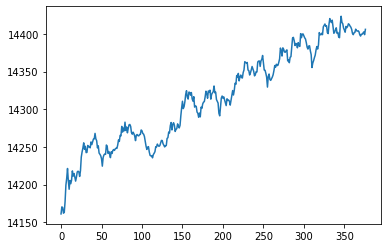

In [3]:
import matplotlib.pyplot as plt
plt.plot(df['c'])

# 5-Minute

In [4]:
dfV=pd.read_csv("F_vol.csv")
dfV

,t,c,o,h,l,v,vo,s
0,1619063100,14163.349609,14218.599609,14218.599609,14155.299805,29105,0,ok
1,1619063400,14205.099609,14164.200195,14223.900391,14162.200195,17371,29105,ok
2,1619063700,14218.250000,14203.049805,14218.849609,14189.200195,12579,46476,ok
3,1619064000,14209.900391,14218.700195,14218.700195,14200.349609,12337,59055,ok
4,1619064300,14218.500000,14209.049805,14221.900391,14207.349609,10766,71392,ok
...,...,...,...,...,...,...,...,...
71,1619084400,14406.250000,14411.400391,14415.849609,14406.099609,11526,473389,ok
72,1619084700,14406.400391,14405.400391,14407.150391,14397.750000,15005,484915,ok
73,1619085000,14399.150391,14407.950195,14411.650391,14399.049805,15994,499920,ok
74,1619085300,14402.750000,14399.700195,14402.750000,14396.000000,8502,515914,ok


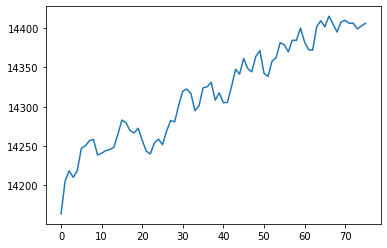

In [5]:
import matplotlib.pyplot as plt
plt.plot(dfV['c'])

# Merging

In [6]:
npDf=np.array(df)
npDfV=np.array(dfV)

In [7]:
npDfV

array([[1619063100, 14163.349609375, 14218.599609375, 14218.599609375,
        14155.299804688, 29105, 0, 'ok'],
       [1619063400, 14205.099609375, 14164.200195312, 14223.900390625,
        14162.200195312, 17371, 29105, 'ok'],
       [1619063700, 14218.25, 14203.049804688, 14218.849609375,
        14189.200195312, 12579, 46476, 'ok'],
       [1619064000, 14209.900390625, 14218.700195312, 14218.700195312,
        14200.349609375, 12337, 59055, 'ok'],
       [1619064300, 14218.5, 14209.049804688, 14221.900390625,
        14207.349609375, 10766, 71392, 'ok'],
       [1619064600, 14246.900390625, 14218.950195312, 14255.900390625,
        14212.450195312, 10641, 82158, 'ok'],
       [1619064900, 14250.25, 14245.049804688, 14253.599609375,
        14233.700195312, 8653, 92799, 'ok'],
       [1619065200, 14256.700195312, 14252.650390625, 14259.5,
        14241.549804688, 9470, 101452, 'ok'],
       [1619065500, 14258.349609375, 14257.599609375, 14270.150390625,
        14251.599609375, 870

In [8]:
counter=0
opti=0
for i in npDfV[1:,:]:
    buff=i[0]
    
    for j in range(opti,npDf.shape[0]):
        if npDf[j][0]==buff:
            opti=j
            break
    
    npDf[j-4:j+1,-3]=i[-3]/5
    if counter%5000==0:
        print(counter)
    counter+=1

0


In [9]:
MergedData=pd.DataFrame(npDf[:,:-2],columns=['time','currentVal','open','high','low','volume'])

In [10]:
MergedData.to_csv("Nifty50.csv",index=False)